In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

#1
df = pd.read_csv('NationalNames.csv')

In [4]:
#2
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [6]:
#3
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [7]:
#4
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [9]:
#5
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [15]:
#6
len(df['Name'].unique())

93889

In [20]:
#7
df.groupby(['Gender'])[['Name']].nunique()

,Name
Gender,
F,64911
M,39199


In [25]:
#8
df[(df['Year'] == 2010) & (df['Gender'] == 'M')].head(5) 

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [82]:
#9
col = df['Count']
max_val = col.max()
min_val = col.min()
pos = df[df['Count'] == max_val].index[0]
"The name is " + df.iloc[pos]['Name'] + " in " + str(df.iloc[pos]['Year'])

'The name is Linda in 1947'

In [29]:
#10
df[df['Count'] == min_val]['Count'].count()

254615

In [83]:
#11
df.groupby(['Year'])[['Name']].nunique()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


In [51]:
#12
col = df.groupby(['Year'])[['Name']].nunique()
max_unique = col.max()[0]
col.loc[col['Name'] == max_unique]

,Name
Year,
2008,32488


In [98]:
#13
subset_df = df[df["Year"] == 2008].copy()
max_count = subset_df['Count'].max()
subset_df.loc[subset_df['Count'] == max_count]['Name'].iloc[0]

'Jacob'

In [102]:
#14
subset_df = df[(df['Gender']=='F') & (df['Name'] == 'Jacob')].copy()
max_count = subset_df['Count'].max()
subset_df[subset_df['Count']==max_count]

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [3]:
#15
new_df = df.groupby(['Year', 'Name', 'Gender']).sum().unstack().dropna().groupby(['Year']).count()
df_max = new_df.unstack().max()
df_max
dd = new_df[new_df['Count'] == df_max].dropna().drop(columns = 'M', level=1).drop(columns = 'F', level=1)
dd['Count'] = df_max
dd

,Count
Gender,
Year,
2008,2557


In [241]:
#16
df.groupby(['Year'])[['Count']].sum().head(5)

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


In [269]:
#17
col = df.groupby(['Year'])[['Count']].sum()
max = col.max()[0]
col.loc[col['Count'] == max]

,Count
Year,
1957,4200026


In [271]:
#18
df.groupby(['Year', 'Gender'])[['Count']].sum().unstack().head(5)

Count        
Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445

In [276]:
#19
new_df = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
new_df[new_df.F > new_df.M].count()[0]

54

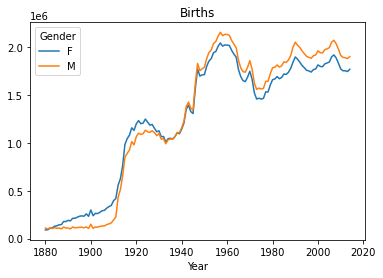

In [17]:
#20
births = df.groupby(['Year', 'Gender'])[['Count']].sum().unstack().droplevel(axis = 1, level = 0)
births.plot(title = "Births");

In [258]:
#21
males = df[((df['Gender']=='M') & df['Name'])]
females = df[((df['Gender']=='F') & df['Name'])] 
series_fem = females['Name']
series_male = males['Name']
comm_list = pd.Series(list(set(series_fem).intersection(set(series_male))))
len(comm_list)

10221

In [287]:
#22
new_df = df[(df['Name']=='Barbara') & (df['Gender'] == 'M')]
new_df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
num_df = new_df
num_df.Count.sum()

4139

In [10]:
#find top 3 least popular female names of 2014 23
df[(df['Year'] == 2014) & (df['Gender'] == 'F') & (df['Count'] == 5)].count()
#how much times girls were named Michel


Id        2680
Name      2680
Year      2680
Gender    2680
Count     2680
dtype: int64

In [5]:
#how much times girls were named Michel
new_df = df[(df['Name']=='Michael') & (df['Gender'] == 'F')]
new_df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
num_df = new_df
num_df.Count.sum()


21607

In [19]:
new_df = df[(df['Name']=='Yesenia') & (df['Gender'] == 'M')]
new_df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
num_df = new_df
num_df.Count.sum()

314